# Hbars
Example of bar charts with 1-d histograms.




**Author:** Rene Brun  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 01:54 AM.</small></i>

In [1]:
  // Try to open first the file cernstaff.root in tutorials/tree directory
TString filedir = gROOT->GetTutorialDir();
filedir += TString("/tree/");
TString filename = "cernstaff.root";
bool fileNotFound = gSystem->AccessPathName(filename); // note opposite return code

If file is not found try to generate it uing the macro tree/cernbuild.c

In [2]:
if (fileNotFound) {
   TString macroName = filedir + "cernbuild.C";
   if (!gInterpreter->IsLoaded(macroName)) gInterpreter->LoadMacro(macroName);
   gROOT->ProcessLineFast("cernbuild()");
}
TFile * f = TFile::Open(filename);
if (!f) {
   Error("hbars","file cernstaff.root not found");
   return 0;
}
TTree *T = (TTree*)f->Get("T");
if (!T) {
   Error("hbars","Tree T is not present in file %s",f->GetName() );
   return 0;
}
T->SetFillColor(45);
TCanvas *c1 = new TCanvas("c1","histograms with bars",700,800);
c1->SetFillColor(42);
c1->Divide(1,2);

******************************************************************************
*Tree    :T         : CERN 1988 staff data                                   *
*Entries :     3354 : Total =          176339 bytes  File  Size =      15005 *
*        :          : Tree compression factor =   2.74                       *
******************************************************************************
*Br    0 :Category  : Category/I                                             *
*Entries :     3354 : Total  Size=      14073 bytes  One basket in memory    *
*Baskets :        0 : Basket Size=      32000 bytes  Compression=   1.00     *
*............................................................................*
*Br    1 :Flag      : Flag/i                                                 *
*Entries :     3354 : Total  Size=      14049 bytes  One basket in memory    *
*Baskets :        0 : Basket Size=      32000 bytes  Compression=   1.00     *
*...................................................

Horizontal bar chart

In [3]:
c1->cd(1); gPad->SetGrid(); gPad->SetLogx(); gPad->SetFrameFillColor(33);
T->Draw("Nation","","hbar2");

Vertical bar chart

In [4]:
c1->cd(2); gPad->SetGrid(); gPad->SetFrameFillColor(33);
T->Draw("Division>>hDiv","","goff");
TH1F *hDiv   = (TH1F*)gDirectory->Get("hDiv");
hDiv->SetStats(0);
TH1F *hDivFR = (TH1F*)hDiv->Clone("hDivFR");
T->Draw("Division>>hDivFR","Nation==\"FR\"","goff");
hDiv->SetBarWidth(0.45);
hDiv->SetBarOffset(0.1);
hDiv->SetFillColor(49);
TH1 *h1 = hDiv->DrawCopy("bar2");
hDivFR->SetBarWidth(0.4);
hDivFR->SetBarOffset(0.55);
hDivFR->SetFillColor(50);
TH1 *h2 = hDivFR->DrawCopy("bar2,same");

TLegend *legend = new TLegend(0.55,0.65,0.76,0.82);
legend->AddEntry(h1,"All nations","f");
legend->AddEntry(h2,"French only","f");
legend->Draw();

c1->cd();
delete f;
return c1;

Draw all canvases 

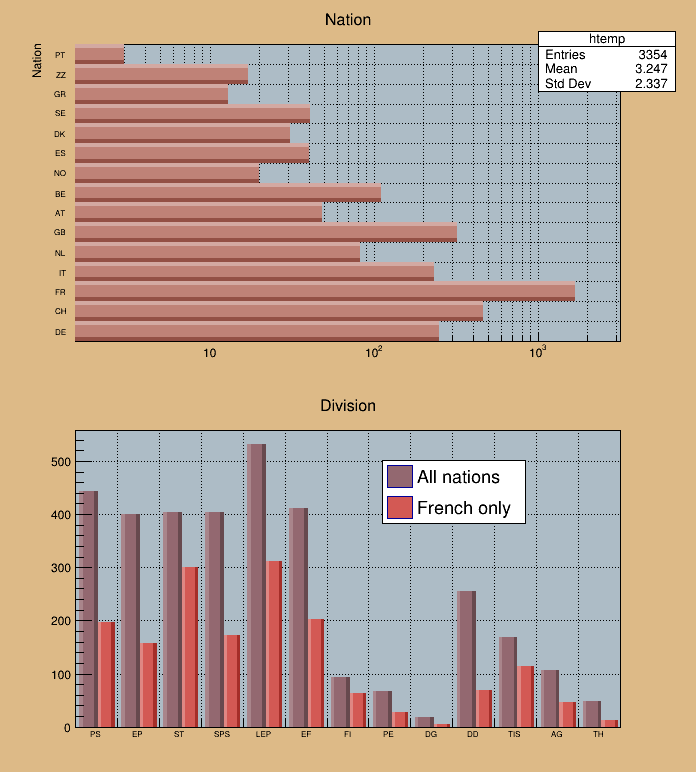

In [5]:
gROOT->GetListOfCanvases()->Draw()